<a href="https://colab.research.google.com/github/satyajitghana/PadhAI-Course/blob/master/14_PyTorchIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

/raid/home/piyushmishra/miniconda3/envs/newenv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Initialise tensors

In [2]:
x = torch.ones(3, 2)
print(x)
x = torch.zeros(3, 2)
print(x)
x = torch.rand(3, 2)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[0.1648, 0.3552],
        [0.9503, 0.4890],
        [0.2483, 0.4572]])


In [3]:
x = torch.empty(3, 2)
print(x)
y = torch.zeros_like(x)
print(y)

tensor([[4.5993e-37, 4.5856e-41],
        [4.5852e-37, 4.5856e-41],
        [4.5467e-37, 4.5856e-41]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [ ]:
x = torch.linspace(0, 1, steps=5)
print(x)

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


In [ ]:
x = torch.tensor([[1, 2], 
                 [3, 4], 
                 [5, 6]])
print(x)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


## Slicing tensors

In [ ]:
print(x.size())
print(x[:, 1]) 
print(x[0, :]) 

torch.Size([3, 2])
tensor([2, 4, 6])
tensor([1, 2])


In [ ]:
y = x[1, 1]
print(y)
print(y.item())

tensor(4)
4


## Reshaping tensors

In [ ]:
print(x)
y = x.view(2, 3)
print(y)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
y = x.view(6,-1) 
print(y)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])


## Simple Tensor Operations

In [4]:
x = torch.ones([3, 2])
y = torch.ones([3, 2])
z = x + y
print(z)
z = x - y
print(z)
z = x * y
print(z)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [ ]:
z = y.add(x)
print(z)
print(y)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [ ]:
# modify in-place
z = y.add_(x)
print(z)
print(y)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])


## Numpy <> PyTorch

In [ ]:
x_np = x.numpy()
print(type(x), type(x_np))
print(x_np)

<class 'torch.Tensor'> <class 'numpy.ndarray'>
[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [ ]:
a = np.random.randn(5)
print(a)
# copies the reference as well
a_pt = torch.from_numpy(a)
print(type(a), type(a_pt))
print(a_pt)

[ 1.13793665  0.62926498 -1.70186599 -1.66115142  1.05646883]
<class 'numpy.ndarray'> <class 'torch.Tensor'>
tensor([ 1.1379,  0.6293, -1.7019, -1.6612,  1.0565], dtype=torch.float64)


In [ ]:
np.add(a, 1, out=a)
print(a)
print(a_pt) 

[ 2.13793665  1.62926498 -0.70186599 -0.66115142  2.05646883]
tensor([ 2.1379,  1.6293, -0.7019, -0.6612,  2.0565], dtype=torch.float64)


In [ ]:
%%time
for i in range(100):
  a = np.random.randn(100,100)
  b = np.random.randn(100,100)
  c = np.matmul(a, b)

CPU times: user 144 ms, sys: 104 ms, total: 248 ms
Wall time: 139 ms


In [ ]:
%%time
for i in range(100):
  a = torch.randn([100, 100])
  b = torch.randn([100, 100])
  c = torch.matmul(a, b)

CPU times: user 27.3 ms, sys: 1.33 ms, total: 28.6 ms
Wall time: 80.4 ms


In [ ]:
%%time
for i in range(10):
  a = np.random.randn(10000,10000)
  b = np.random.randn(10000,10000)
  c = a + b

CPU times: user 1min 24s, sys: 743 ms, total: 1min 25s
Wall time: 1min 25s


In [ ]:
%%time
for i in range(10):
  a = torch.randn([10000, 10000])
  b = torch.randn([10000, 10000])
  c = a + b

CPU times: user 17.8 s, sys: 22 ms, total: 17.8 s
Wall time: 17.8 s


## CUDA support

In [ ]:
print(torch.cuda.device_count())

1


In [ ]:
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

Tesla K80


In [2]:
cuda0 = torch.device('cuda')

/raid/home/piyushmishra/miniconda3/envs/newenv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
a = torch.ones(3, 2, device=cuda0)
b = torch.ones(3, 2, device=cuda0)
c = a + b
print(c)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]], device='cuda:0')


In [ ]:
print(a)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], device='cuda:0')


In [ ]:
%%time
for i in range(10):
  a = np.random.randn(10000,10000)
  b = np.random.randn(10000,10000)
  np.add(b, a)

CPU times: user 1min 25s, sys: 198 ms, total: 1min 25s
Wall time: 1min 25s


In [ ]:
%%time
for i in range(10):
  a_cpu = torch.randn([10000, 10000])
  b_cpu = torch.randn([10000, 10000])
  b_cpu.add_(a_cpu)

CPU times: user 17.7 s, sys: 169 ms, total: 17.8 s
Wall time: 17.8 s


In [ ]:
%%time
for i in range(10):
  a = torch.randn([10000, 10000], device=cuda0)
  b = torch.randn([10000, 10000], device=cuda0)
  b.add_(a)

CPU times: user 2.58 ms, sys: 4 ms, total: 6.57 ms
Wall time: 9.65 ms


In [ ]:
%%time
for i in range(10):
  a = np.random.randn(10000,10000)
  b = np.random.randn(10000,10000)
  np.matmul(b, a)

KeyboardInterrupt: ignored

In [ ]:
%%time
for i in range(10):
  a_cpu = torch.randn([10000, 10000])
  b_cpu = torch.randn([10000, 10000])
  torch.matmul(a_cpu, b_cpu)

In [ ]:
%%time
for i in range(10):
  a = torch.randn([10000, 10000], device=cuda0)
  b = torch.randn([10000, 10000], device=cuda0)
  torch.matmul(a, b)

CPU times: user 8.96 ms, sys: 3.99 ms, total: 12.9 ms
Wall time: 17.8 ms


## Autodiff

In [9]:
import torch
x = torch.ones([3, 2], requires_grad=True)    
# with requires_grad we can say 
# that we can differentiate any function which is
#  related to x(z) diff wrt to x
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)


In [10]:
y = x*x + 5
print(y)

tensor([[6., 6.],
        [6., 6.],
        [6., 6.]], grad_fn=<AddBackward0>)


In [11]:
s= y.sum()
s.backward()
x.grad

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])

In [17]:
z = y*y + 1
print(z)



tensor([[37., 37.],
        [37., 37.],
        [37., 37.]], grad_fn=<AddBackward0>)


In [18]:
t = torch.sum(z)
print(t)
# till now it is a forward pass

tensor(222., grad_fn=<SumBackward0>)


In [19]:
t.backward()   # from now 


In [20]:
print(x.grad)  # derivative of t wrt to x

tensor([[12., 12.],
        [12., 12.],
        [12., 12.]])


$t = \sum_i z_i, z_i = y_i^2 + 1, y_i = x_i + 5$

$\frac{\partial t}{\partial x_i} = \frac{\partial z_i}{\partial x_i} = \frac{\partial z_i}{\partial y_i} \frac{\partial y_i}{\partial x_i} = 2y_i \times 1$


At x = 1, y = 6, $\frac{\partial t}{\partial x_i} = 12$

t wrt to xi can be written as zi wrt xi because for any other zj where j not equal to i 
zj wrt to xi will be zero.

In [10]:
x = torch.ones([3, 2], requires_grad=True)
y = x + 5
r = 1/(1 + torch.exp(-y))
print(r)
# we sum up even though we want to diff r wrt x
# if you want to call r.backward() then if we have tensors with multiple values i must
# have an argument.
s = torch.sum(r)
s.backward()
print(x.grad)   # ri(1-ri) where ri is 0.9975

tensor([[0.9975, 0.9975],
        [0.9975, 0.9975],
        [0.9975, 0.9975]], grad_fn=<MulBackward0>)
tensor([[0.0025, 0.0025],
        [0.0025, 0.0025],
        [0.0025, 0.0025]])


In [ ]:
# if you call backward directly on r then pass an argument same size(all ones) as an r 
# r.backward() gives you differentiate of r to x, a will act as a diff s wrt r.

In [ ]:
# A bit tricky concept
x = torch.ones([3, 2], requires_grad=True)
y = x + 5
r = 1/(1 + torch.exp(-y))
a = torch.ones([3, 2])
r.backward(a)  # is computing derivative of r wrt x
print(x.grad)

tensor([[0.0025, 0.0025],
        [0.0025, 0.0025],
        [0.0025, 0.0025]])


$\frac{\partial{s}}{\partial{x}} = \frac{\partial{s}}{\partial{r}} \cdot \frac{\partial{r}}{\partial{x}}$

For the above code $a$ represents $\frac{\partial{s}}{\partial{r}}$ and then $x.grad$ gives directly $\frac{\partial{s}}{\partial{x}}$

## Autodiff example that looks like what we have been doing

In [11]:
x = torch.randn(20, requires_grad=True)  # I have 20 data pts
y = 3*x - 2

In [12]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

y_hat = w*x + b

loss = torch.sum((y_hat - y)**2)

In [13]:
print(loss)

tensor(166.9963, grad_fn=<SumBackward0>)


In [14]:
loss.backward()

In [15]:
print(w.grad, b.grad)

tensor([-120.3507]) tensor([-51.7662])


## Do it in a loop

In [8]:
import torch
learning_rate = 0.01

w = torch.tensor([1.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

print(w.item(), b.item())

for i in range(10):
  x = torch.randn([20, 1])

  y = 3*x - 2
  
  y_hat = w*x + b
  loss = torch.sum((y_hat - y)**2)
  print(loss)
  loss.backward()
   # we have already build our forward pass if we don't write this 
   # w = w - lr*w.grad() would also go into the forward pass(computation graph)
   #  which we don't want.

  with torch.no_grad():                
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad
    

    # we want gradient to set to zero so that in next epoch again compute
    w.grad.zero_()
    b.grad.zero_()

  print(w.item(), b.item())
  

1.0 1.0
tensor(215.7822, grad_fn=<SumBackward0>)
1.4472225904464722 -0.14039993286132812
tensor(54.3767, grad_fn=<SumBackward0>)
1.7493094205856323 -0.4729774296283722
tensor(78.2562, grad_fn=<SumBackward0>)
2.204193353652954 -1.1253607273101807
tensor(30.1123, grad_fn=<SumBackward0>)
2.559617280960083 -1.4905364513397217
tensor(9.3386, grad_fn=<SumBackward0>)
2.745514392852783 -1.69645094871521
tensor(2.2904, grad_fn=<SumBackward0>)
2.8225016593933105 -1.7828181982040405
tensor(1.1706, grad_fn=<SumBackward0>)
2.857426881790161 -1.8620781898498535
tensor(0.5683, grad_fn=<SumBackward0>)
2.891460418701172 -1.9093002080917358
tensor(0.4083, grad_fn=<SumBackward0>)
2.9301931858062744 -1.9529813528060913
tensor(0.1390, grad_fn=<SumBackward0>)
2.9558463096618652 -1.9740253686904907


In [81]:
p=torch.randn([2,3])

In [82]:
p

tensor([[-0.8418, -0.7089, -0.0119],
        [ 0.0494,  0.5947, -0.2307]])

## Do it for a large problem

In [83]:
%%time
learning_rate = 0.001
N = 10000000
epochs = 200

w = torch.rand([N], requires_grad=True)
b = torch.ones([1], requires_grad=True)

# print(torch.mean(w).item(), b.item())

for i in range(epochs):
  
  x = torch.randn([N])
  y = torch.dot(3*torch.ones([N]), x) - 2
  
  y_hat = torch.dot(w, x) + b
  loss = torch.sum((y_hat - y)**2)
  
  loss.backward()
  
  with torch.no_grad():
    #before loss.backward() it is forward prop and after that it is backward prop so till
    # now we have done both forward and back prop but now if we want to update the paramerters of
    # the model with the below pytorch thinks that  w=w-somehting might again be a continous of a 
    # forward pass(continue to build the computational graph) or to say i don't want any backprop

    w -= learning_rate * w.grad
    b -= learning_rate * b.grad
    
    w.grad.zero_()     # set gradients to zero
    b.grad.zero_()

  # print(torch.mean(w).item(), b.item())
  

0.5015039443969727 -9.189061164855957
0.5005476474761963 -26.992393493652344
0.4863433539867401 26.584476470947266
0.41137972474098206 -422.5045471191406
-0.5429626703262329 944.7420654296875
-1.9854642152786255 10659.181640625
-17.474288940429688 47843.390625
-24.298166275024414 5773.3515625
-170.1705780029297 370007.75
343.8456726074219 1344474.25
3244.939208984375 -7179179.0
3533.00927734375 -3618520.5
11159.9375 -110736432.0
338988.6875 1084698752.0
1765607.0 13416030208.0
-12109914.0 -8864036864.0
-41019400.0 -82148876288.0
-47863388.0 -13211230208.0
-279533408.0 -381161340928.0
-529739552.0 -951628333056.0
-833850944.0 5373071196160.0
3044702720.0 -69276899737600.0
36210483200.0 211562136600576.0
16402895872.0 -864695028285440.0
-4020632027136.0 -7740021767405568.0
-13712084697088.0 -7.317858909211853e+16
-73129065971712.0 5.517166382573158e+16
40121592184832.0 1.1846775994402734e+18
83425327316992.0 -7.899324466646221e+17
-170611888357376.0 1.1371482406482608e+19
6.1474863340060

KeyboardInterrupt: 

In [ ]:
%%time
learning_rate = 0.001
N = 10000000
epochs = 200

# Every tensor has to be on the device

w = torch.rand([N], requires_grad=True, device=cuda0)
b = torch.ones([1], requires_grad=True, device=cuda0)

# print(torch.mean(w).item(), b.item())

for i in range(epochs):
  
  x = torch.randn([N], device=cuda0)
  y = torch.dot(3*torch.ones([N], device=cuda0), x) - 2
  
  y_hat = torch.dot(w, x) + b
  loss = torch.sum((y_hat - y)**2)
  
  loss.backward()
  
  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad
    
    w.grad.zero_()
    b.grad.zero_()

  #print(torch.mean(w).item(), b.item())
  

CPU times: user 798 ms, sys: 506 ms, total: 1.3 s
Wall time: 1.33 s


# My own code 

In [1]:
import torch
x=torch.randn([20])
y=5*x-3

/raid/home/piyushmishra/miniconda3/envs/newenv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
w=torch.ones([1],requires_grad=True)
b=torch.ones([1],requires_grad=True)
lr=0.00001

In [3]:
loss_lt=[]
for i in range(50):
    y_hat= w*x+b
    loss = torch.sum(y_hat-y)**2
    print(loss)
    loss.backward()
    loss_lt.append(loss.item())
    with torch.no_grad():    
        w -= lr * w.grad
        b -= lr * b.grad
    
        w.grad.zero_()
        b.grad.zero_()

tensor(5685.1050, grad_fn=<PowBackward0>)
tensor(5594.2095, grad_fn=<PowBackward0>)
tensor(5504.7656, grad_fn=<PowBackward0>)
tensor(5416.7529, grad_fn=<PowBackward0>)
tensor(5330.1475, grad_fn=<PowBackward0>)
tensor(5244.9258, grad_fn=<PowBackward0>)
tensor(5161.0684, grad_fn=<PowBackward0>)
tensor(5078.5513, grad_fn=<PowBackward0>)
tensor(4997.3525, grad_fn=<PowBackward0>)
tensor(4917.4517, grad_fn=<PowBackward0>)
tensor(4838.8291, grad_fn=<PowBackward0>)
tensor(4761.4634, grad_fn=<PowBackward0>)
tensor(4685.3354, grad_fn=<PowBackward0>)
tensor(4610.4238, grad_fn=<PowBackward0>)
tensor(4536.7100, grad_fn=<PowBackward0>)
tensor(4464.1753, grad_fn=<PowBackward0>)
tensor(4392.7998, grad_fn=<PowBackward0>)
tensor(4322.5649, grad_fn=<PowBackward0>)
tensor(4253.4536, grad_fn=<PowBackward0>)
tensor(4185.4468, grad_fn=<PowBackward0>)
tensor(4118.5288, grad_fn=<PowBackward0>)
tensor(4052.6792, grad_fn=<PowBackward0>)
tensor(3987.8833, grad_fn=<PowBackward0>)
tensor(3924.1233, grad_fn=<PowBack

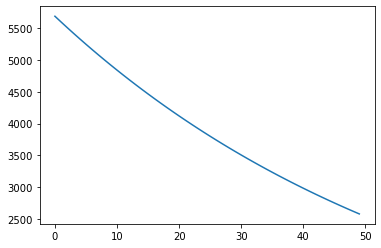

In [5]:
import matplotlib.pyplot as plt
plt.plot(loss_lt)

In [11]:
import torch
x=torch.randn([20,1])

In [12]:
w= torch.ones([1,1],requires_grad=True)
b=torch.ones([1,1],requires_grad=True)

In [13]:
w

tensor([[1.]], requires_grad=True)

In [14]:
y=5*x-10

In [15]:
lr=0.01
for i in range(800):
    y_pred= w*x+b
    loss=torch.sum((y-y_pred)**2)
    loss.backward()
    with torch.no_grad():
        w-= lr* w.grad
        b-= lr* b.grad

        w.grad.zero_()
        b.grad.zero_()
    print(w,b)


tensor([[3.5071]], requires_grad=True) tensor([[-3.9235]], requires_grad=True)
tensor([[4.7008]], requires_grad=True) tensor([[-6.5495]], requires_grad=True)
tensor([[5.2323]], requires_grad=True) tensor([[-7.9688]], requires_grad=True)
tensor([[5.4361]], requires_grad=True) tensor([[-8.7509]], requires_grad=True)
tensor([[5.4832]], requires_grad=True) tensor([[-9.1935]], requires_grad=True)
tensor([[5.4598]], requires_grad=True) tensor([[-9.4528]], requires_grad=True)
tensor([[5.4087]], requires_grad=True) tensor([[-9.6115]], requires_grad=True)
tensor([[5.3505]], requires_grad=True) tensor([[-9.7134]], requires_grad=True)
tensor([[5.2944]], requires_grad=True) tensor([[-9.7822]], requires_grad=True)
tensor([[5.2444]], requires_grad=True) tensor([[-9.8308]], requires_grad=True)
tensor([[5.2013]], requires_grad=True) tensor([[-9.8665]], requires_grad=True)
tensor([[5.1651]], requires_grad=True) tensor([[-9.8935]], requires_grad=True)
tensor([[5.1349]], requires_grad=True) tensor([[-9.9